**This cell loads the Brazilian hourly electricity demand dataset, converts it into a Pandas DataFrame, and renames the columns for clarity. The Datetime column is converted to a datetime type and set as the DataFrame index to allow proper time series analysis. Finally, the first few rows of the cleaned and indexed dataset are displayed to verify the data structure.**

In [7]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
ds = load_dataset("SamuelM0422/Hourly-Electricity-Demand-Brazil-Dataset")
df = ds['train'].to_pandas()

# Rename columns ONLY ONCE
df.rename(columns={
    "id_subsistema": "Subsystem_ID",
    "nom_subsistema": "Subsystem_Name",
    "din_instante": "Datetime",
    "val_cargaenergiahomwmed": "Load_MWh"
}, inplace=True)

# Convert to datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set index properly
df.set_index('Datetime', inplace=True)

print(df.head())


                    Subsystem_ID Subsystem_Name    Load_MWh
Datetime                                                   
2020-01-01 00:00:00            N          NORTE   4889.1460
2020-01-01 00:00:00           NE       NORDESTE   9617.9750
2020-01-01 00:00:00            S            SUL  10013.7420
2020-01-01 00:00:00           SE        SUDESTE  33108.8615
2020-01-01 01:00:00            N          NORTE   4953.3150


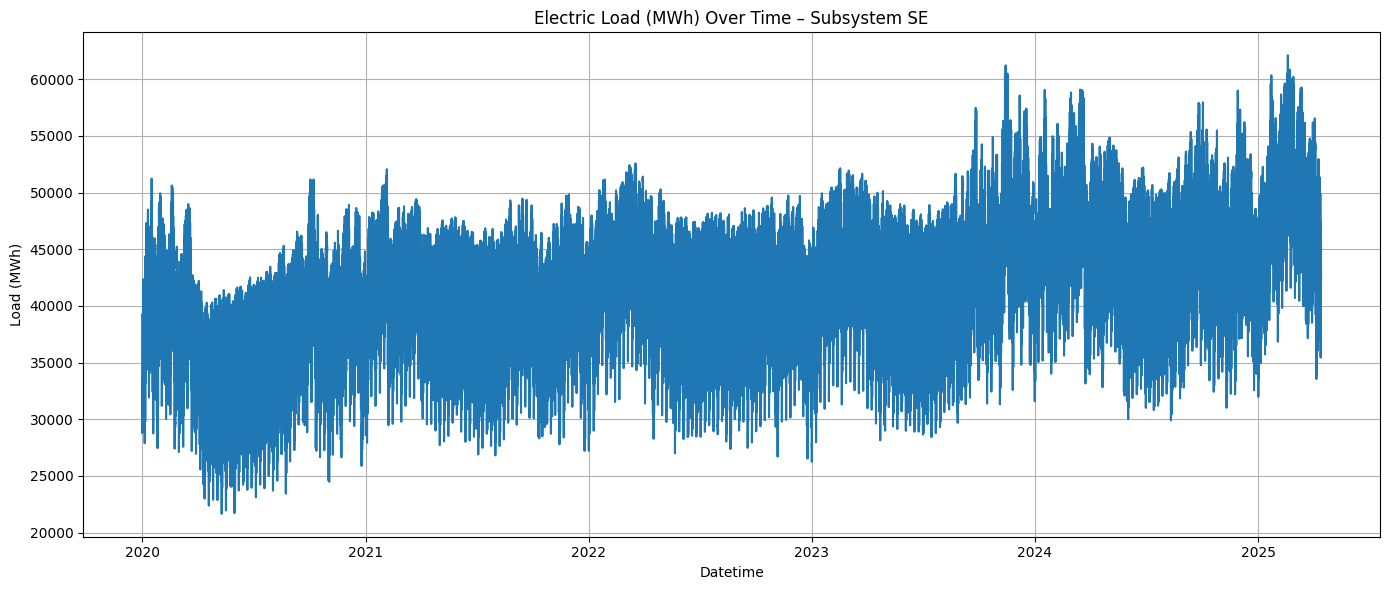

In [8]:
subsystem = "SE"  # Choose: N, NE, S, SE

df_sub = df[df["Subsystem_ID"] == subsystem].copy()

plt.figure(figsize=(14, 6))
plt.plot(df_sub.index, df_sub["Load_MWh"])
plt.title(f"Electric Load (MWh) Over Time – Subsystem {subsystem}")
plt.xlabel("Datetime")
plt.ylabel("Load (MWh)")
plt.grid(True)
plt.tight_layout()
plt.show()



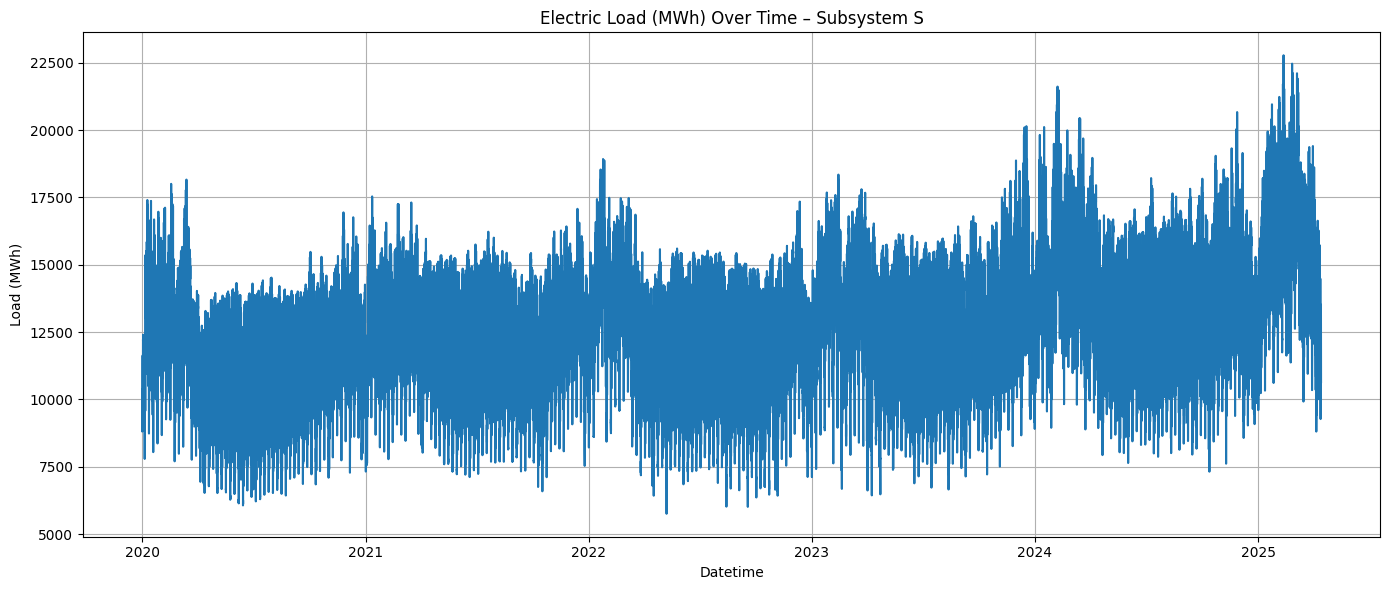

In [10]:
import matplotlib.pyplot as plt

subsystem = "S"  # choose N, NE, S, SE

df_sub = df[df["Subsystem_ID"] == subsystem]

plt.figure(figsize=(14, 6))
plt.plot(df_sub.index, df_sub["Load_MWh"])
plt.title(f"Electric Load (MWh) Over Time – Subsystem {subsystem}")
plt.xlabel("Datetime")
plt.ylabel("Load (MWh)")
plt.grid(True)
plt.tight_layout()
plt.show()


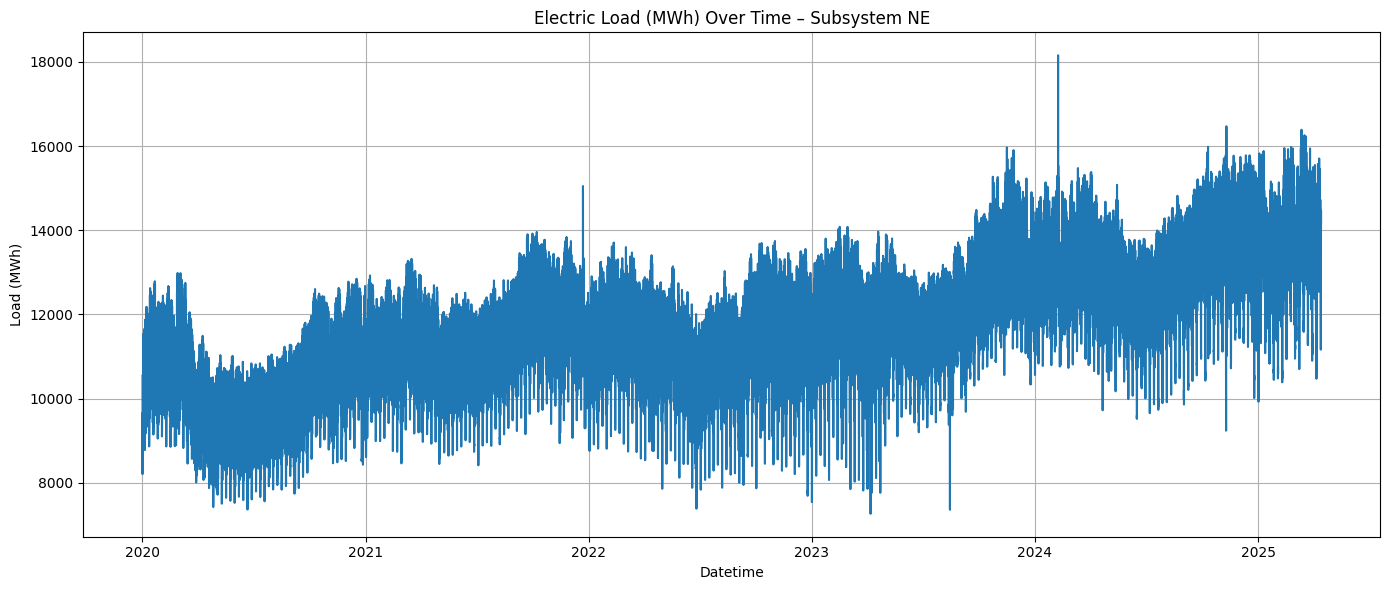

In [11]:
import matplotlib.pyplot as plt

subsystem = "NE"  # N, NE, S, SE

df_sub = df[df["Subsystem_ID"] == subsystem]

plt.figure(figsize=(14, 6))
plt.plot(df_sub.index, df_sub["Load_MWh"])  # <-- FIXED
plt.title(f"Electric Load (MWh) Over Time – Subsystem {subsystem}")
plt.xlabel("Datetime")
plt.ylabel("Load (MWh)")
plt.grid(True)
plt.tight_layout()
plt.show()


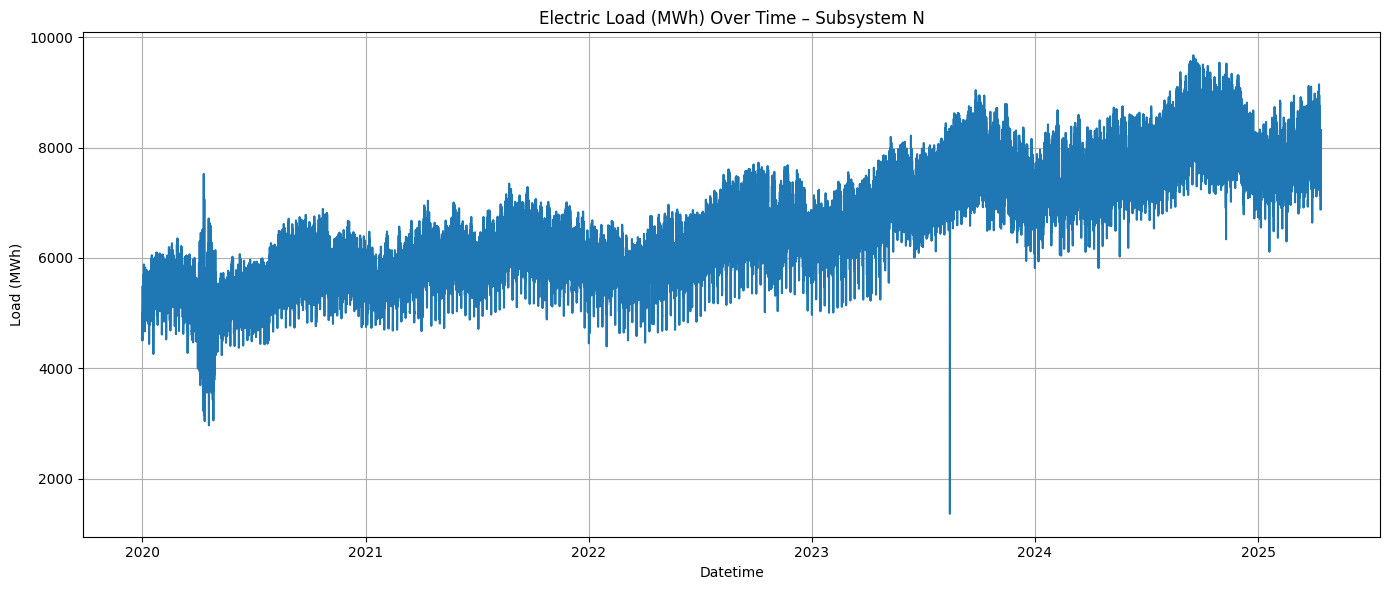

In [12]:
import matplotlib.pyplot as plt

subsystem = "N"  # N, NE, S, SE

df_sub = df[df["Subsystem_ID"] == subsystem]

plt.figure(figsize=(14, 6))
plt.plot(df_sub.index, df_sub["Load_MWh"])   # <-- FIX
plt.title(f"Electric Load (MWh) Over Time – Subsystem {subsystem}")
plt.xlabel("Datetime")
plt.ylabel("Load (MWh)")
plt.grid(True)
plt.tight_layout()
plt.show()


**This cell checks the df_sub DataFrame for duplicate timestamps in the Datetime index. It first counts the total number of duplicated entries and then optionally prints the exact duplicated timestamps. Identifying duplicates is important because repeated timestamps can cause errors or bias in time series analysis and forecasting models like ARIMA or SARIMA.**

In [13]:
# Check for duplicate index values
duplicates = df_sub.index.duplicated()
print("Number of duplicate timestamps:", duplicates.sum())

# Optional: see which timestamps are duplicated
print("Duplicated timestamps:")
print(df_sub.index[duplicates])

Number of duplicate timestamps: 0
Duplicated timestamps:
DatetimeIndex([], dtype='datetime64[ns]', name='Datetime', freq=None)


**This line checks for missing values in the Load_MWh column of the selected subsystem (df_sub). It prints the total number of NaN entries, helping to identify gaps in the data that may need to be handled before time series modeling or forecasting.**

In [14]:
print("Number of missing Load_MWh values:", df_sub.isna().sum())

Number of missing Load_MWh values: Subsystem_ID      0
Subsystem_Name    0
Load_MWh          0
dtype: int64


**This cell identifies outliers in the electricity load time series for the SE subsystem using the Interquartile Range (IQR) method. The first (Q1) and third (Q3) quartiles of the load data are computed, and the IQR is used to define lower and upper bounds for normal values. Any load values outside these bounds are considered outliers. The cell prints the calculated bounds and counts the number of outlier points, providing insight into extreme fluctuations that may distort time series modeling.**

In [18]:
subsystem = "SE"  # N, NE, S, SE
df_sub = df[df["Subsystem_ID"] == subsystem].copy()

import numpy as np

# Only the Load column
data = df_sub["Load_MWh"]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Count outliers
outliers_count = ((data < lower_bound) | (data > upper_bound)).sum()
print("Number of outliers:", outliers_count)


Lower bound: 21647.52700000375
Upper bound: 59562.46499999376
Number of outliers: 45


**This cell performs additive seasonal decomposition on the electricity load time series, splitting it into trend, seasonal, and residual components. The residual, which is the stationary part of the series after removing trend and daily seasonality, is extracted for further analysis. The decomposition.plot() function visualizes all three components in a single figure, allowing a clear inspection of the underlying trend, repeating seasonal patterns, and the stationary residual fluctuations.**

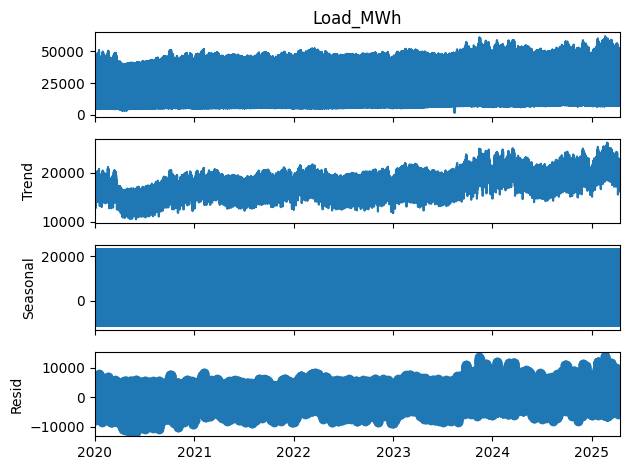

In [19]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


decomposition = seasonal_decompose(df['Load_MWh'], period=24, model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


stationary_series = residual.dropna()


decomposition.plot()
plt.show()





**This cell performs additive seasonal decomposition on the overall electricity load time series to separate it into trend, seasonal, and residual components. The residual component, representing the stationary part of the series after removing trend and daily seasonality, is extracted and plotted. This stationary residual is suitable for time series modeling methods like ARIMA that require stationarity, and visualizing it helps assess whether the remaining fluctuations are centered and stable over time**.

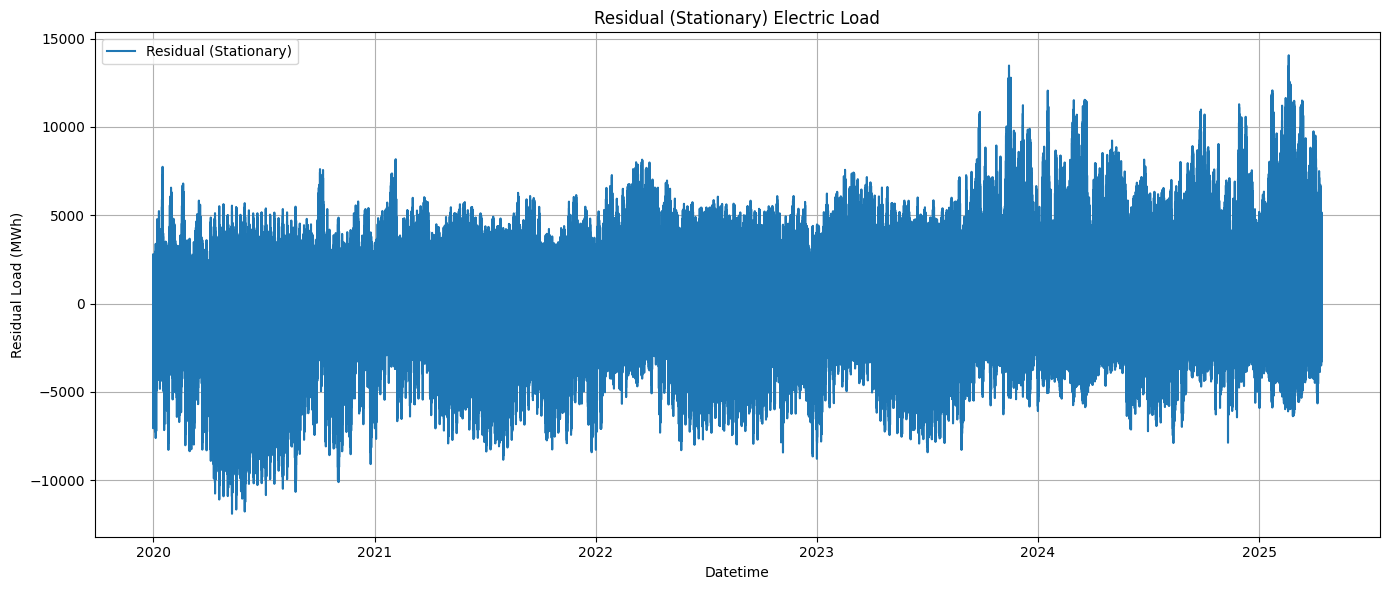

In [ ]:

import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Make sure 'Datetime' is datetime and set as index
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

# Decompose (example: hourly data with daily seasonality, period=24)
decomposition = seasonal_decompose(df['Load_MWh'], period=24, model='additive')

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid.dropna()  # Drop NaNs to get stationary series

# residual is now your stationary series
stationary_series = residual

# Plot only the residual
plt.figure(figsize=(14, 6))
plt.plot(stationary_series.index, stationary_series, label='Residual (Stationary)')
plt.title("Residual (Stationary) Electric Load")
plt.xlabel("Datetime")
plt.ylabel("Residual Load (MWh)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**This cell decomposes the electricity load time series for the North subsystem into trend, seasonal, and residual components using additive seasonal decomposition. The residual component, which represents the stationary part of the series after removing trend and daily seasonality, is extracted and plotted. Visualizing the residual helps to assess the stationary behavior of the series and is useful for fitting models like ARIMA that assume stationarity.**

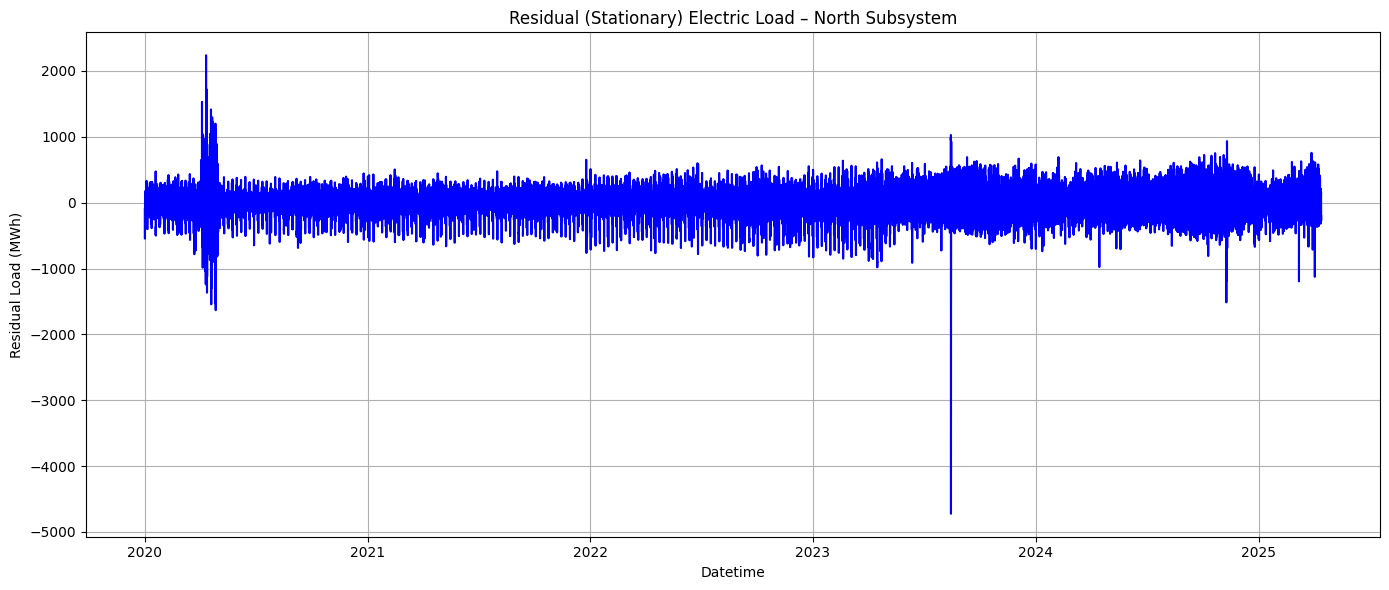

In [ ]:

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decomposex

# Filter North subsystem
df_north = df[df["Subsystem_ID"] == "N"].sort_index()  # Ensure time order

# Decompose the series (hourly data, daily seasonality)
decomp = seasonal_decompose(df_north["Load_MWh"], period=24, model='additive')

# Extract residual (stationary part)
residual = decomp.resid.dropna()

# Plot the residual
plt.figure(figsize=(14, 6))
plt.plot(residual.index, residual, color='blue')
plt.title("Residual (Stationary) Electric Load – North Subsystem")
plt.xlabel("Datetime")
plt.ylabel("Residual Load (MWh)")
plt.grid(True)
plt.tight_layout()
plt.show()




This cell visualizes the **Autocorrelation Function (ACF)** and **Partial Autocorrelation Function (PACF)** of the stationary time series. The ACF plot shows correlations between the series and its lagged values, helping to identify the **moving average (q)** component, while the PACF plot shows the correlation of the series with its lags after removing intermediate correlations, helping to identify the **autoregressive (p)** component. These plots guide the selection of appropriate ARIMA model parameters

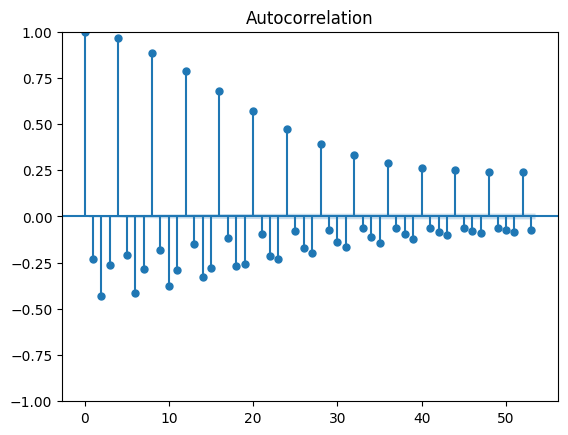

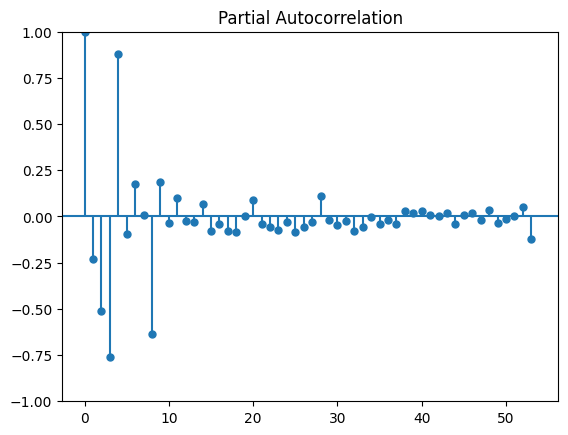

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF to choose p and q
plot_acf(stationary_series)
plot_pacf(stationary_series)
plt.show()

**This cell performs ARIMA-based forecasting for each electricity subsystem (N, NE, S, SE) at two forecast horizons: 24 hours and 168 hours. For each subsystem, it first decomposes the time series into trend, seasonal, and residual components. The ARIMA model is then fitted on the residuals to forecast future deviations, which are combined with the last observed trend and seasonal pattern to reconstruct the full load forecast. The cell evaluates in-sample performance using MAE, saves the fitted ARIMA models as pickle files, and generates plots showing the forecast (green line) extending beyond the last 7 days of actual load data (red line), providing a visual representation of the model’s predictions on unseen future data. All plots are saved in the “images” folder, and the forecast results are stored in the results dictionary.**

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/2.30M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/185280 [00:00<?, ? examples/s]


Processing Subsystem_ID: N


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Subsystem N – MAE for last 24h: 181.87


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Subsystem N – MAE for last 168h: 207.20


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


💾 Saved model: models/N_ARIMA_24h.pkl


/tmp/ipython-input-2769317557.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(df_sub.index[-1] + pd.Timedelta(hours=1),


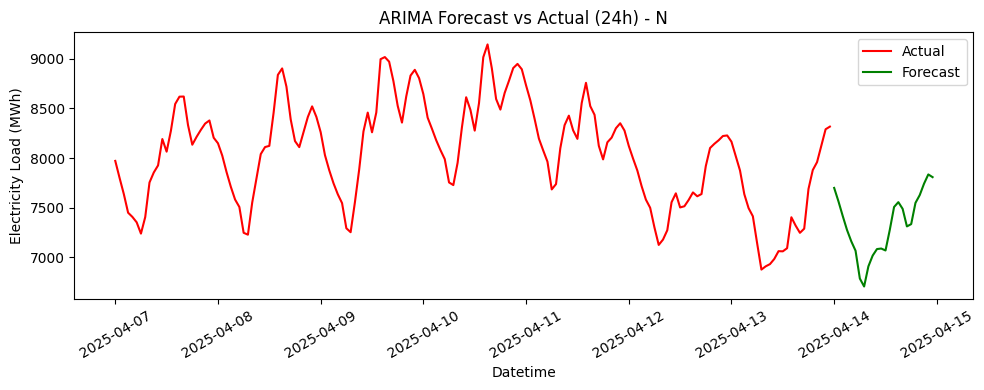

✅ Saved plot: images/ARIMA_N_24h.png


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


💾 Saved model: models/N_ARIMA_168h.pkl


/tmp/ipython-input-2769317557.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(df_sub.index[-1] + pd.Timedelta(hours=1),


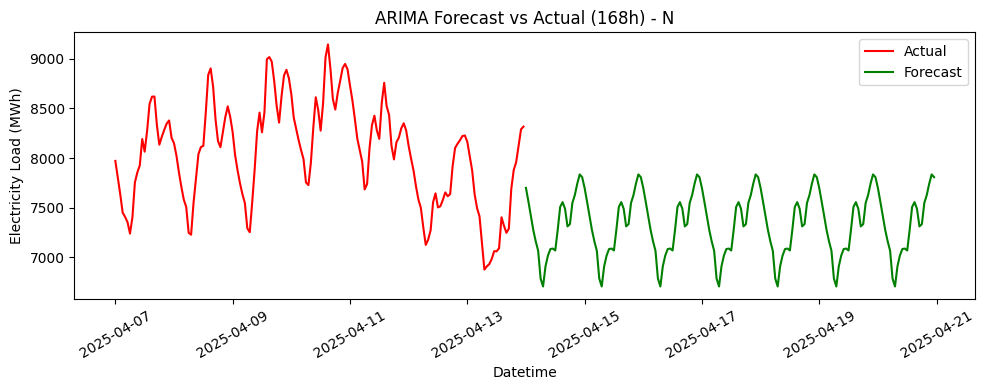

✅ Saved plot: images/ARIMA_N_168h.png

Processing Subsystem_ID: NE


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Subsystem NE – MAE for last 24h: 590.46


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Subsystem NE – MAE for last 168h: 1200.27


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


💾 Saved model: models/NE_ARIMA_24h.pkl


/tmp/ipython-input-2769317557.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(df_sub.index[-1] + pd.Timedelta(hours=1),


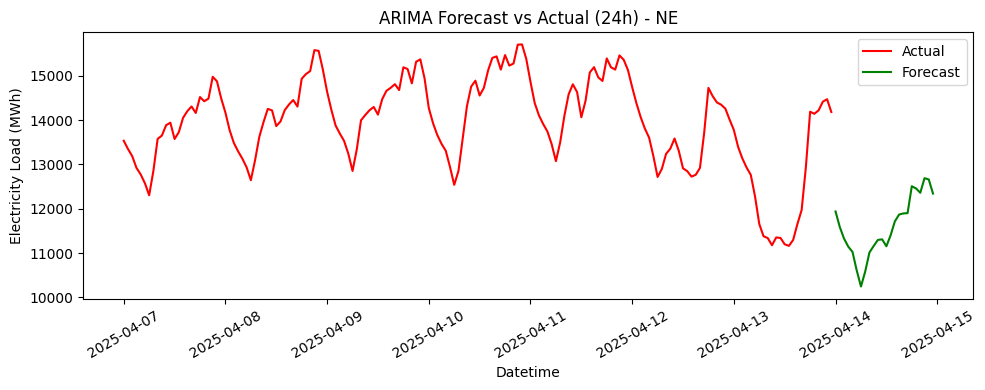

✅ Saved plot: images/ARIMA_NE_24h.png


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


💾 Saved model: models/NE_ARIMA_168h.pkl


/tmp/ipython-input-2769317557.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(df_sub.index[-1] + pd.Timedelta(hours=1),


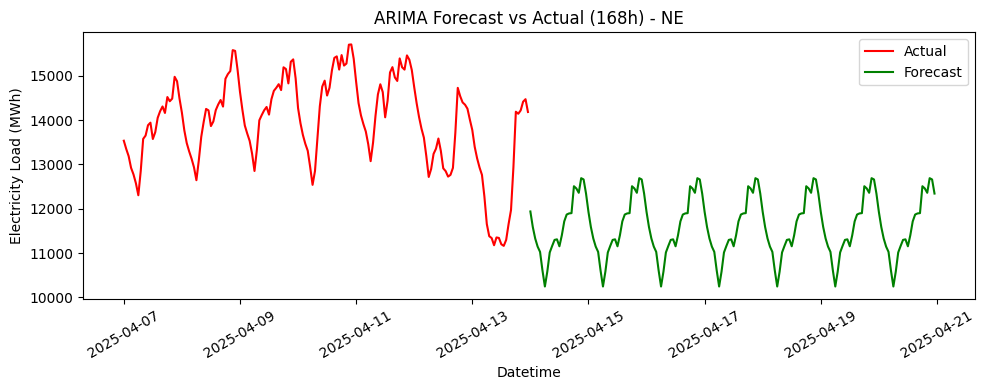

✅ Saved plot: images/ARIMA_NE_168h.png

Processing Subsystem_ID: S


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Subsystem S – MAE for last 24h: 546.01


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Subsystem S – MAE for last 168h: 862.17


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


💾 Saved model: models/S_ARIMA_24h.pkl


/tmp/ipython-input-2769317557.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(df_sub.index[-1] + pd.Timedelta(hours=1),


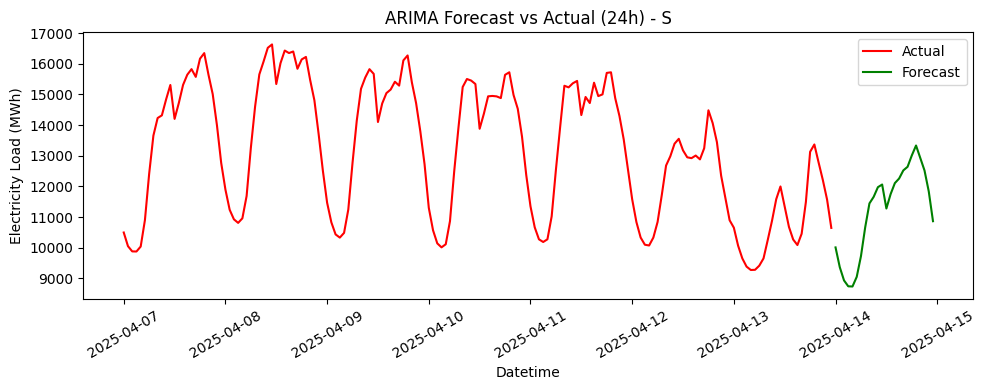

✅ Saved plot: images/ARIMA_S_24h.png


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


💾 Saved model: models/S_ARIMA_168h.pkl


/tmp/ipython-input-2769317557.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(df_sub.index[-1] + pd.Timedelta(hours=1),


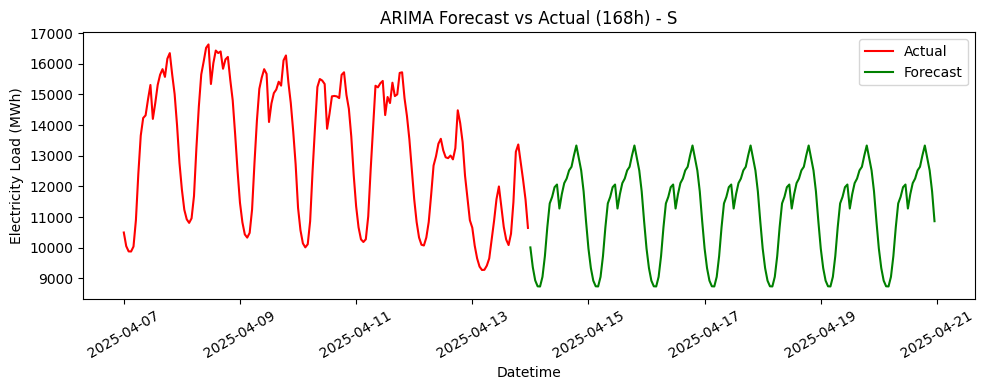

✅ Saved plot: images/ARIMA_S_168h.png

Processing Subsystem_ID: SE


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Subsystem SE – MAE for last 24h: 1648.32


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Subsystem SE – MAE for last 168h: 2091.30


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


💾 Saved model: models/SE_ARIMA_24h.pkl


/tmp/ipython-input-2769317557.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(df_sub.index[-1] + pd.Timedelta(hours=1),


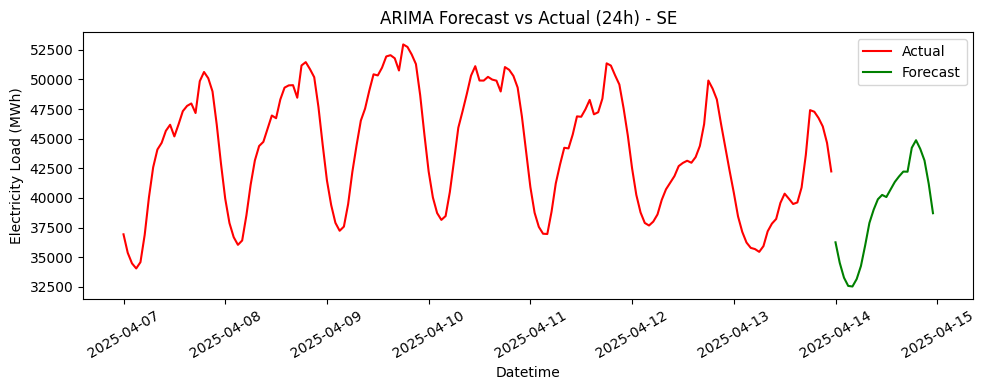

✅ Saved plot: images/ARIMA_SE_24h.png


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


💾 Saved model: models/SE_ARIMA_168h.pkl


/tmp/ipython-input-2769317557.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(df_sub.index[-1] + pd.Timedelta(hours=1),


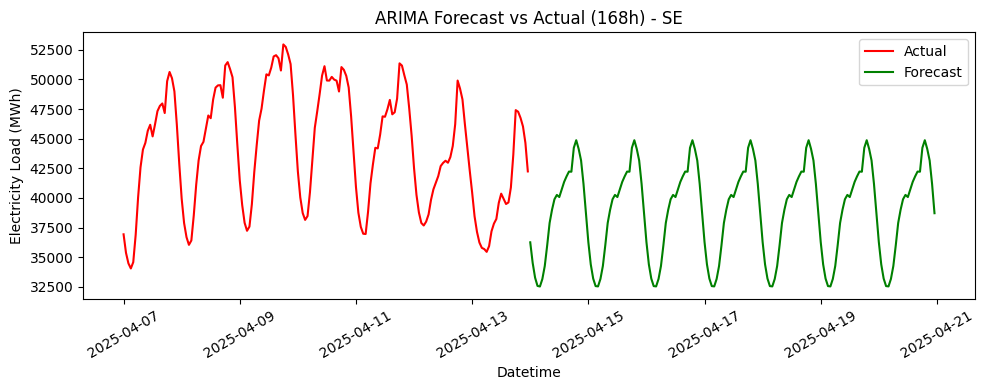

✅ Saved plot: images/ARIMA_SE_168h.png


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from datasets import load_dataset

# -------------------------------
# Parameters
# -------------------------------
forecast_horizons = [24, 168]
p, d, q = 2, 1, 0

output_folder = "forecasts"
images_folder = "images"
models_folder = "models"        # NEW: folder for model pickle files

os.makedirs(output_folder, exist_ok=True)
os.makedirs(images_folder, exist_ok=True)
os.makedirs(models_folder, exist_ok=True)   # NEW

# -------------------------------
# Load dataset
# -------------------------------
ds = load_dataset("SamuelM0422/Hourly-Electricity-Demand-Brazil-Dataset")
df = ds['train'].to_pandas()

df.rename(columns={
    'id_subsistema': 'Subsystem_ID',
    'nom_subsistema': 'Subsystem_Name',
    'din_instante': 'Datetime',
    'val_cargaenergiahomwmed': 'Load_MWh'
}, inplace=True)

df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

# -------------------------------
# Forecasting per region
# -------------------------------
results = {}

for subsystem in df['Subsystem_ID'].unique():
    print(f"\nProcessing Subsystem_ID: {subsystem}")
    df_sub = df[df['Subsystem_ID'] == subsystem].sort_index()

    # Decompose
    decomp = seasonal_decompose(df_sub['Load_MWh'], period=24, model='additive')
    residual = decomp.resid.dropna()

    # -------------------------------
    # Evaluation (MAE)
    # -------------------------------
    for horizon in forecast_horizons:
        train = residual[:-horizon]
        test = residual[-horizon:]

        model_arima = ARIMA(train, order=(p, d, q))
        model_arima_fit = model_arima.fit()

        forecast_residual = model_arima_fit.forecast(steps=horizon)
        mae = mean_absolute_error(test, forecast_residual)
        print(f"Subsystem {subsystem} – MAE for last {horizon}h: {mae:.2f}")

    # -------------------------------
    # Forecast future & SAVE models
    # -------------------------------
    full_forecasts = {}

    for horizon in forecast_horizons:

        # Fit model on full residuals
        model_arima = ARIMA(residual, order=(p,d,q))
        model_arima_fit = model_arima.fit()

        # ------------ SAVE MODEL AS PICKLE ------------
        model_path = os.path.join(models_folder, f"{subsystem}_ARIMA_{horizon}h.pkl")
        with open(model_path, "wb") as f:
            pickle.dump(model_arima_fit, f)

        print(f"💾 Saved model: {model_path}")

        # Forecast residuals
        forecast_residual = model_arima_fit.forecast(steps=horizon)

        # Reconstruct full forecast (trend + seasonal)
        last_trend = decomp.trend.dropna().iloc[-1]
        seasonal_pattern = decomp.seasonal[-24:]
        seasonal_forecast = np.tile(seasonal_pattern, int(np.ceil(horizon/24)))[:horizon]
        full_forecast = forecast_residual + last_trend + seasonal_forecast

        full_forecasts[horizon] = full_forecast

        # -------------------------------
        # Plotting
        # -------------------------------
        forecast_index = pd.date_range(df_sub.index[-1] + pd.Timedelta(hours=1),
                                       periods=horizon, freq='H')

        plt.figure(figsize=(10,4))
        plt.plot(df_sub.index[-24*7:], df_sub['Load_MWh'].iloc[-24*7:], color='red', label='Actual')
        plt.plot(forecast_index, full_forecast, color='green', label='Forecast')
        plt.title(f"ARIMA Forecast vs Actual ({horizon}h) - {subsystem}")
        plt.xlabel("Datetime")
        plt.ylabel("Electricity Load (MWh)")
        plt.tick_params(axis='x', rotation=30)
        plt.legend()
        plt.tight_layout()

        outfile = os.path.join(images_folder, f"ARIMA_{subsystem}_{horizon}h.png")
        plt.savefig(outfile, dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()

        print(f"✅ Saved plot: {outfile}")

    results[subsystem] = full_forecasts


**This code cell generates forecast–actual comparison plots for each electricity subsystem (N, NE, S, SE) and for each forecast horizon (24 hours and 168 hours). For every subsystem, the code retrieves the previously computed ARIMA forecasts, builds the corresponding future datetime index, and extracts the actual load values from the end of the historical data to allow visual comparison. It then plots the actual electricity load (red line) against the ARIMA forecasted values (green line), showing how well the model predicts short-term and long-term demand. Each plot is saved as a high-resolution PNG file inside the “images” folder. These visualizations help evaluate the forecasting performance of the ARIMA model for different regions and horizons by highlighting how closely the predictions follow the real demand patterns.**

/tmp/ipython-input-1379253774.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(df_sub.index[-1]+pd.Timedelta(hours=1), periods=horizon, freq='H')


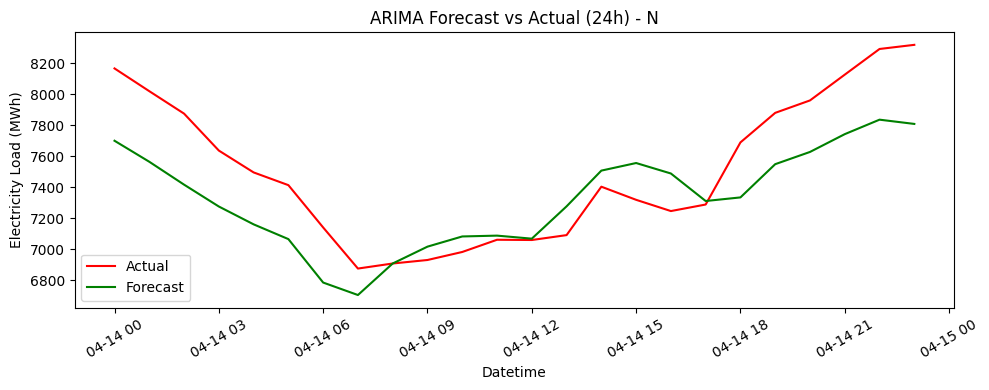

✅ Saved: images/ARIMA_N_24h.png


/tmp/ipython-input-1379253774.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(df_sub.index[-1]+pd.Timedelta(hours=1), periods=horizon, freq='H')


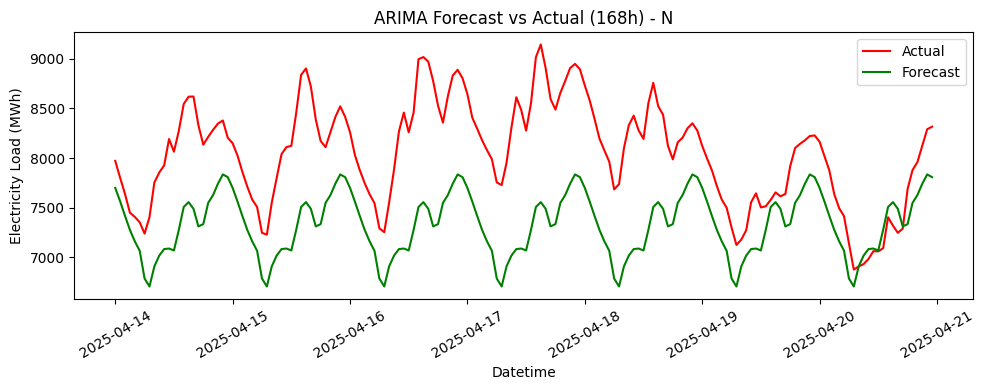

✅ Saved: images/ARIMA_N_168h.png


/tmp/ipython-input-1379253774.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(df_sub.index[-1]+pd.Timedelta(hours=1), periods=horizon, freq='H')


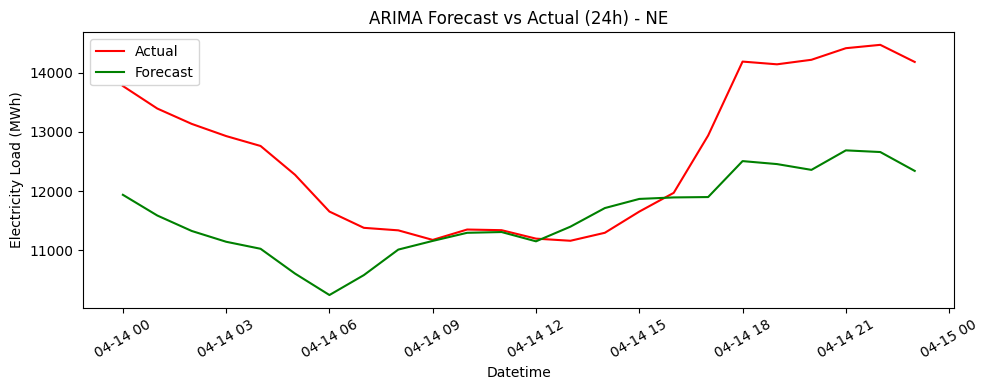

✅ Saved: images/ARIMA_NE_24h.png


/tmp/ipython-input-1379253774.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(df_sub.index[-1]+pd.Timedelta(hours=1), periods=horizon, freq='H')


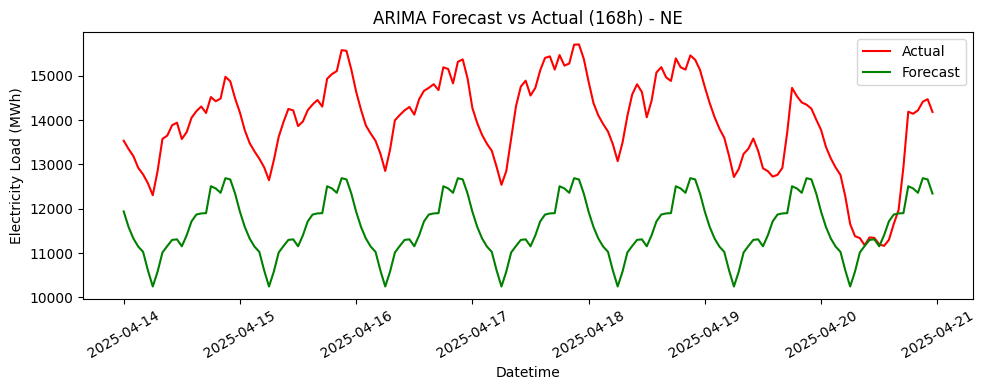

✅ Saved: images/ARIMA_NE_168h.png


/tmp/ipython-input-1379253774.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(df_sub.index[-1]+pd.Timedelta(hours=1), periods=horizon, freq='H')


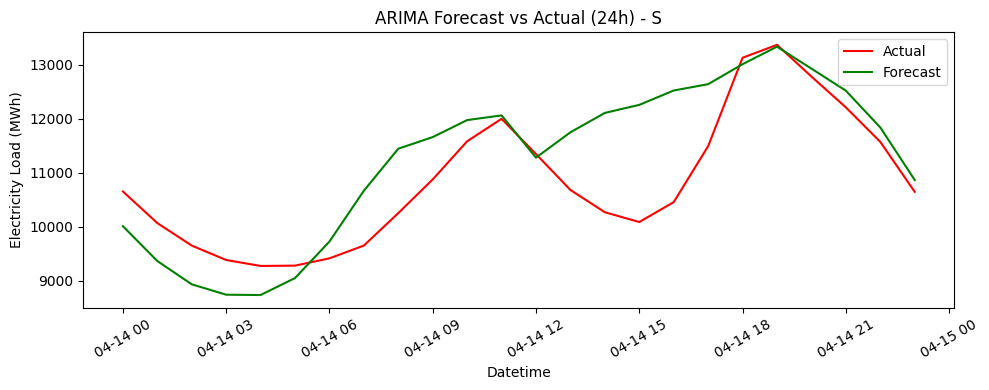

✅ Saved: images/ARIMA_S_24h.png


/tmp/ipython-input-1379253774.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(df_sub.index[-1]+pd.Timedelta(hours=1), periods=horizon, freq='H')


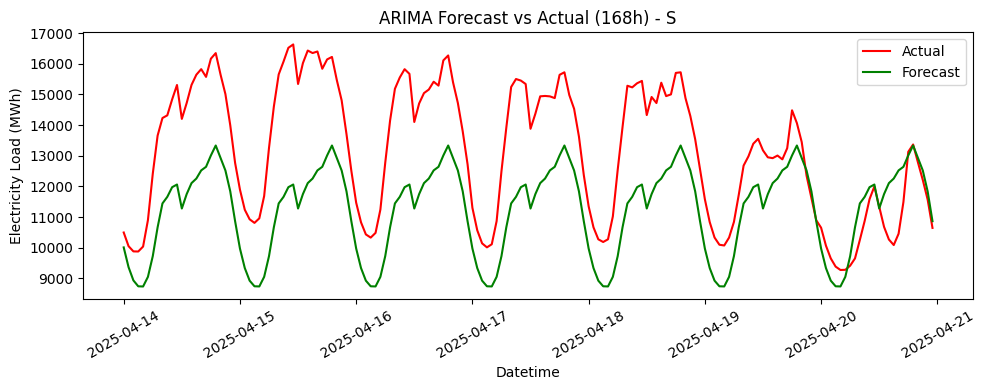

✅ Saved: images/ARIMA_S_168h.png


/tmp/ipython-input-1379253774.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(df_sub.index[-1]+pd.Timedelta(hours=1), periods=horizon, freq='H')


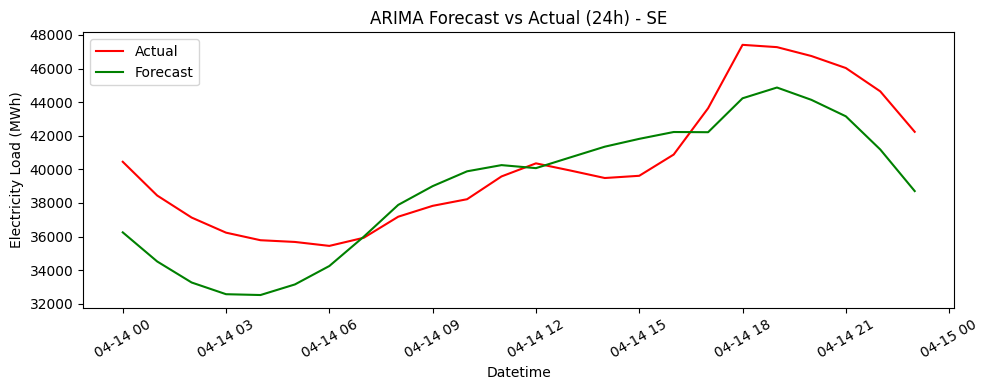

✅ Saved: images/ARIMA_SE_24h.png


/tmp/ipython-input-1379253774.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(df_sub.index[-1]+pd.Timedelta(hours=1), periods=horizon, freq='H')


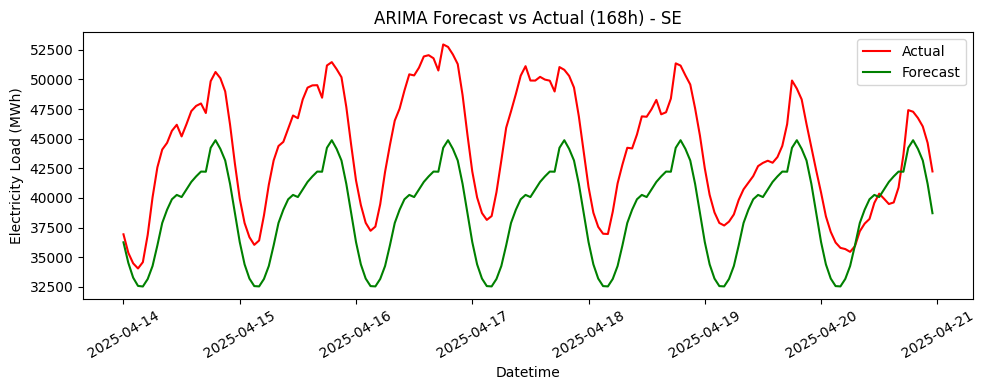

✅ Saved: images/ARIMA_SE_168h.png


In [ ]:
import os

# Create folder for images
images_folder = "images"
os.makedirs(images_folder, exist_ok=True)

for subsystem in df['Subsystem_ID'].unique():
    full_forecasts = results[subsystem]  # من الكود السابق
    df_sub = df[df['Subsystem_ID'] == subsystem].sort_index()

    for horizon in forecast_horizons:
        forecast = full_forecasts[horizon]
        forecast_index = pd.date_range(df_sub.index[-1]+pd.Timedelta(hours=1), periods=horizon, freq='H')

        # Prepare plotting dataframe
        plot_df = pd.DataFrame({
            'date': forecast_index,
            'Forecast': forecast
        })
        # For "Actual" values, use last h hours from original data if horizon <= 24,
        # or replicate last known actuals for visualization
        actual_index = df_sub.index[-horizon:] if horizon <= len(df_sub) else df_sub.index[-len(df_sub):]
        actual_values = df_sub['Load_MWh'].iloc[-horizon:] if horizon <= len(df_sub) else df_sub['Load_MWh'].iloc[-len(df_sub):]
        plot_df['Actual'] = actual_values.values

        # Plot
        plt.figure(figsize=(10,4))
        plt.plot(plot_df['date'], plot_df['Actual'], color='red', label='Actual')
        plt.plot(plot_df['date'], plot_df['Forecast'], color='green', label='Forecast')
        plt.title(f"ARIMA Forecast vs Actual ({horizon}h) - {subsystem}")
        plt.xlabel("Datetime")
        plt.ylabel("Electricity Load (MWh)")
        plt.tick_params(axis='x', rotation=30)
        plt.legend()
        plt.tight_layout()

        # Save figure
        outfile = os.path.join(images_folder, f"ARIMA_{subsystem}_{horizon}h.png")
        plt.savefig(outfile, dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()
        print(f"✅ Saved: {outfile}")
